In [44]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*- #

# ------------------------------------------------------------------------------
#
#   Copyright (C) 2022 Concordia NAVlab. All rights reserved.
#
#   @Filename: draw_depth_estimation_res.py
#
#   @Author: Shun Li
#
#   @Date: 2022-01-13
#
#   @Email: 2015097272@qq.com
#
#   @Description:
#
# ------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import MultipleLocator

In [45]:
data_set_path = "/home/ls/m300_depth_filter/m300_depth_data/m300_grabbed_data_1_31.6"
depth_whole = pd.read_csv(data_set_path+"/depth_estimation.csv")
depth_whole

,index,x,y,z,Unnamed: 4
0,42,1.372032,-0.217726,10.753701,NaN
1,42,1.407558,-0.209079,10.789284,NaN
2,42,1.307540,-0.182904,10.248265,NaN
3,42,1.456234,-0.204710,11.328808,NaN
4,42,1.382035,-0.176246,10.750920,NaN
...,...,...,...,...,...
12369,223,3.853415,-0.324151,29.233852,NaN
12370,223,3.932721,-0.543772,28.845127,NaN
12371,223,3.618833,-0.390618,28.837843,NaN
12372,223,3.892647,-0.389279,28.832010,NaN


In [46]:
x = depth_whole["x"].to_numpy()
y = depth_whole["y"].to_numpy()
z = depth_whole["z"].to_numpy()
index = depth_whole["index"].to_numpy()

cond = z > 0
x = x[cond]
y = y[cond]
z = z[cond]
index = index[cond]


In [47]:
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 12,
}

In [48]:
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

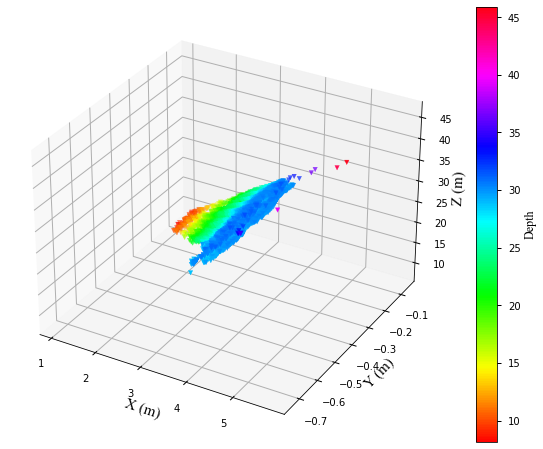

In [49]:
style.use('seaborn-notebook')

fig = plt.figure(figsize=[12,8])
ax = fig.gca(projection='3d')

p2 = ax.scatter3D(x, y, z, marker = "v", c=z, cmap="hsv")

ax.set_xlabel('X (m)', font=font1) # 画出坐标轴
ax.set_ylabel('Y (m)', font=font1)
ax.set_zlabel('Z (m)', font=font1)
cb = fig.colorbar(p2)
cb.set_label(label="Depth", font=font2)
fig.savefig(data_set_path+'/3d_points.pdf')

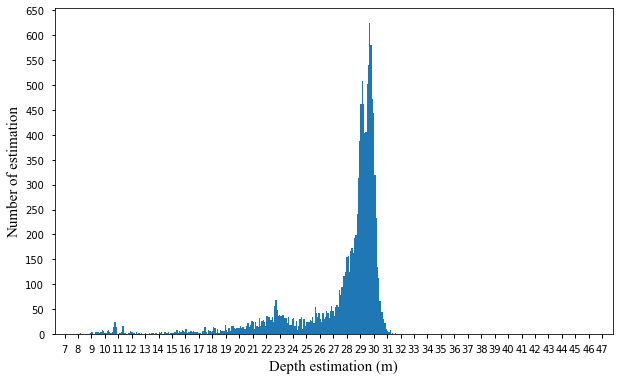

In [50]:
fig = plt.figure(figsize=[10,6])
ax = fig.gca()
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(50)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
# plt.xlim(6,33)

n, bins_limits, patches = plt.hist(z, bins=400)

plt.xlabel('Depth estimation (m)', font1)  
plt.ylabel('Number of estimation', font1)  
# plt.grid()
# plt.legend(prop=font2)
plt.show()
fig.savefig(data_set_path+'/hist_points.pdf')

In [51]:
# find the mid value
sort_z = np.sort(z)
mid = sort_z[int(sort_z.size/2)]
mid

29.066274643000003

In [52]:
max_index = np.argmax(n)
max_index

228

In [53]:
print(bins_limits[max_index])

29.66820610058


In [54]:
abs(mid - 31.6)/mid *100

8.717062603033623